**Case Study**

This case study involves studying the dataset about freq in startups
& gathering various insights about industries,investors, preferred
locations and other trends using the libraries numpy, pandas as well
as matplotlib for filtering and visualizing data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Data cleaning and analysing**

This section is for cleaning and analysing the dataset and it's features.
It provides insights on the quality of data present and the
modification that needs to be carried out.



In [9]:
fund = pd.read_csv('startup_funding.csv', skipinitialspace= True)
df = fund.copy()
df.fillna('', inplace = True)

df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,,
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,,
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",


**Section 1**

Number of fundings in the preferred cities
namely Mumbai, Bangalore and cities in NCR(New Delhi, Noida & Gurgaon) 

While cleaning and analysing the data it was found that the city locations
needed corrections, eg. 'New Delhi' is also present as 'Delhi' as well as with some foriegn states.

The initial part of this section includes creating a frequency map for the given
locations and then zip-sorting them based on frequency.

The final part includes plotting the bar graph using the zipped data.


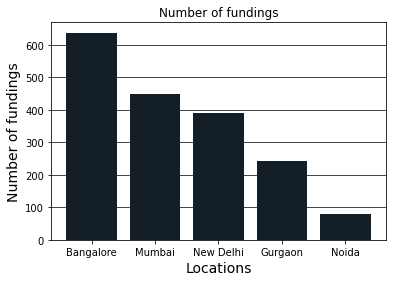

Bangalore had the maximum number of fundings.


In [10]:
#Analysis of City Locations
sorted(df['CityLocation'].unique())

#Data
cities = np.array(['Bangalore', 'Mumbai',
        'New Delhi', 'Gurgaon', 'Noida'])
fundings = np.zeros(5,dtype = int)

for city in df.CityLocation:
    city = city.lower()
    if 'bangalore' in city:
        fundings[0] += 1
    elif 'mumbai' in city:
        fundings[1] += 1
    elif 'delhi' in city:
        fundings[2] += 1
    elif 'gurgaon' in city:
        fundings[3] += 1
    elif 'noida' in city:
        fundings[4] += 1 

#Graph
y,x = zip(*sorted(list( zip(fundings,cities)), reverse =True))

fig,ax = plt.subplots()
ax.grid(color = '#141E27', axis = 'y')
ax.set_axisbelow(True)
ax.set_title(label = 'Number of fundings')
ax.bar(x,y, color = '#141E27')

ax.set_xlabel('Locations', fontsize = 14)
ax.set_ylabel('Number of fundings', fontsize = 14)

plt.show()
print(x[0],'had the maximum number of fundings.')

**Section 2**

The top five investors (based on frequency of investments)


In [11]:
#Analysis of Investor names
# x = df.InvestorsName.unique()
# for name in x:
#     if('undisclosed' in name.lower()):
#         print(name)

#Data
investors = {}
for names in df.InvestorsName:
    if names == '':continue
    for name in names.split(','):
        name = name.strip()
        if name == '':continue
        if 'Undisclosed' in name or 'undisclosed' in name:continue

        if name in investors:
            investors[name] += 1
        else:
            investors[name] = 1

freq = pd.DataFrame(investors.items(), columns = ['Name','Frequency'])
for investor in freq.nlargest(5,'Frequency').Name : print(investor)

Sequoia Capital
Accel Partners
Kalaari Capital
SAIF Partners
Indian Angel Network


**Section 3**

Top 5 investors (based on unique investments)

In [12]:
#Analysis of Startup Names
# x = df.StartupName.unique().astype(str)
# startups = ['oyo', 'flipkart', 'ola','paytm']
# for j in startups:
#     for i in x:
#         if j in i.lower():print(i)

freq,investors = {},{}
for names,company in zip(df.InvestorsName,df.StartupName):
    if names == '':continue
    if company == '':continue
    
    if   company == 'Flipkart.com':company = 'Flipkart'
    elif company == 'Paytm Marketplace' :company = 'Paytm'
    elif company == 'Ola Cabs' or company == 'Olacabs':company = 'Ola'
    elif company in {'Oyo Rooms','OyoRooms','Oyorooms','OYO Rooms'}:
        company = 'Oyo'


    for name in names.split(','):
        name = name.strip()
        if name == '': continue
        if 'Undisclosed' in name or 'undisclosed' in name:continue

        if name in freq:
            if company not in investors[name]:
                investors[name].add(company)
                freq[name] += 1

        else:
            investors[name] = {company}
            freq[name] = 1

f = pd.DataFrame(freq.items(), columns = ['Name','Frequency'])
for investor in f.nlargest(5,'Frequency').Name : print(investor)

Sequoia Capital
Accel Partners
Kalaari Capital
Indian Angel Network
Blume Ventures


**Section 4**

Top five investors based on unique Seed or Crowd Funding based investments


In [17]:
#Analysis of Investment Types
df.InvestmentType.unique()

freq,investors = {},{}
for names,company,funding in zip(df.InvestorsName,
                df.StartupName,df.InvestmentType):

    if names == '':continue
    if company == '':continue
    if funding in {'','Private Equity',
        'PrivateEquity', 'Debt Funding'}:continue
    
    if   company == 'Flipkart.com':company = 'Flipkart'
    elif company == 'Paytm Marketplace' :company = 'Paytm'
    elif company == 'Ola Cabs' or company == 'Olacabs':
        company = 'Ola'
    elif company in {'Oyo Rooms','OyoRooms',
                    'Oyorooms','OYO Rooms'}:company = 'Oyo'

    for name in names.split(','):
        name = name.strip()
        if name == '': continue
        if 'Undisclosed' in name or 'undisclosed' in name:continue

        if name in freq:
            if company not in investors[name]:
                investors[name].add(company)
                freq[name] += 1

        else:
            investors[name] = {company}
            freq[name] = 1

f = pd.DataFrame(freq.items(), columns = ['Name','Frequency'])
for investor in f.nlargest(5,'Frequency').Name : print(investor)

Indian Angel Network
Rajan Anandan
LetsVenture
Anupam Mittal
Kunal Shah


**Section 5**
 
 Top 5 investors (based on unique private equity based investments)

In [201]:
freq,investors = {},{}
for names,company,funding in zip(df.InvestorsName,
                df.StartupName,df.InvestmentType):

    if names == '':continue
    if company == '':continue
    if funding not in {'Private Equity','PrivateEquity'}:continue
    
    if   company == 'Flipkart.com':company = 'Flipkart'
    elif company == 'Paytm Marketplace' :company = 'Paytm'
    elif company == 'Ola Cabs' or company == 'Olacabs':company = 'Ola'
    elif company in {'Oyo Rooms','OyoRooms','Oyorooms','OYO Rooms'}:
        company = 'Oyo'

    for name in names.split(','):
        name = name.strip()
        if name == '': continue
        if 'Undisclosed' in name or 'undisclosed' in name:continue

        if name in freq:
            if company not in investors[name]:
                investors[name].add(company)
                freq[name] += 1

        else:
            investors[name] = {company}
            freq[name] = 1

f = pd.DataFrame(freq.items(), columns = ['Name','Frequency'])
for investor in f.nlargest(5,'Frequency').Name : print(investor)

Sequoia Capital
Accel Partners
Kalaari Capital
Blume Ventures
SAIF Partners
